In [21]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt



In [22]:
config = pd.read_csv("./config.csv")

In [23]:
twitterAPIkey = config['twitterAPIkey'][0]
twitterAPISecret = config['twitterAPISecret'][0]
twitterAPIAccessToken = config['twitterAPIAccessToken'][0]
twitterAPIAccessTokenSecret = config['twitterAPIAccessTokenSecret'][0]

In [24]:
auth = tweepy.OAuthHandler(twitterAPIkey,twitterAPISecret)
auth.set_access_token(twitterAPIAccessToken,twitterAPIAccessTokenSecret)
twitterAPI = tweepy.API(auth,wait_on_rate_limit=True)

In [25]:
search_term = '#bitcoin -filter:retweets'

In [28]:
tweets = tweepy.Cursor(twitterAPI.search_tweets, q=search_term, lang='en', since='2018-11-01', tweet_mode= 'extended').items(2000)
all_tweets = [tweet.full_text for tweet in tweets]

Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter: since
Unexpected parameter

In [30]:
df = pd.DataFrame(all_tweets, columns = ['Tweets'])
df.head()

,Tweets
0,The crypto charging bull. \n#Bitcoin https://t...
1,Big rejection of the 20EMA close to the 200EMA...
2,"- \nBTC price: $44,032 / £33,661 \n\n22.71 Nak..."
3,@ZubyMusic You at the #Bitcoin conference?!
4,@APompliano decisions is where you should gath...


In [32]:
def cleanTwt(twt):
    twt = re.sub('#bitcoin', 'bitcoin', twt)
    twt = re.sub('#Bitcoin', 'Bitcoin', twt)
    twt = re.sub('#[A-Za-z0-9]+', '', twt)
    twt = re.sub('\\n', '', twt)
    twt = re.sub('https?:\/\/\S+', '', twt)
    return twt

In [35]:
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
df.head(10)

,Tweets,Cleaned_Tweets
0,The crypto charging bull. \n#Bitcoin https://t...,The crypto charging bull. Bitcoin
1,Big rejection of the 20EMA close to the 200EMA...,Big rejection of the 20EMA close to the 200EMA...
2,"- \nBTC price: $44,032 / £33,661 \n\n22.71 Nak...","- BTC price: $44,032 / £33,661 22.71 Naks per ..."
3,@ZubyMusic You at the #Bitcoin conference?!,@ZubyMusic You at the Bitcoin conference?!
4,@APompliano decisions is where you should gath...,@APompliano decisions is where you should gath...
5,How David Chaum Went From Inventing Digital Ca...,How David Chaum Went From Inventing Digital Ca...
6,"You call it a trap, I call it a liquidity hunt...","You call it a trap, I call it a liquidity hunt..."
7,@Meta_UFO #GMT #bsc #bitcoin\nMetaUFO\nGood pr...,@Meta_UFO bitcoinMetaUFOGood project@lv_phu@...
8,USDT/SANTOS (Binance) gained 9.83% in the last...,USDT/SANTOS (Binance) gained 9.83% in the last...
9,@Cointelegraph New great metaverse projects🏝 S...,@Cointelegraph New great metaverse projects🏝 S...


In [39]:
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

df.head(200)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,The crypto charging bull. \n#Bitcoin https://t...,The crypto charging bull. Bitcoin,0.0,0.0000
1,Big rejection of the 20EMA close to the 200EMA...,Big rejection of the 20EMA close to the 200EMA...,0.1,0.0000
2,"- \nBTC price: $44,032 / £33,661 \n\n22.71 Nak...","- BTC price: $44,032 / £33,661 22.71 Naks per ...",0.0,0.0000
3,@ZubyMusic You at the #Bitcoin conference?!,@ZubyMusic You at the Bitcoin conference?!,0.0,0.0000
4,@APompliano decisions is where you should gath...,@APompliano decisions is where you should gath...,0.0,0.0000
...,...,...,...,...
195,Good Morning!\n\n“You do Well by doing Good”—M...,Good Morning!“You do Well by doing Good”—Micha...,0.6,0.7875
196,Come on Bitcoin go to $20k already stop wastin...,Come on Bitcoin go to $20k already stop wastin...,0.5,0.6250
197,@Huobi_India #Kawa launching #KawaCoffee soon\...,@Huobi_India launching soonCafe Kawakami 👀do...,0.0,0.0000
198,22059) Current #Bitcoin Price is $43944 #BTC #...,22059) Current Bitcoin Price is $43944 Indica...,0.4,0.0000


In [38]:
def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [40]:
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,The crypto charging bull. \n#Bitcoin https://t...,The crypto charging bull. Bitcoin,0.0,0.0,Neutral
1,Big rejection of the 20EMA close to the 200EMA...,Big rejection of the 20EMA close to the 200EMA...,0.1,0.0,Neutral
2,"- \nBTC price: $44,032 / £33,661 \n\n22.71 Nak...","- BTC price: $44,032 / £33,661 22.71 Naks per ...",0.0,0.0,Neutral
3,@ZubyMusic You at the #Bitcoin conference?!,@ZubyMusic You at the Bitcoin conference?!,0.0,0.0,Neutral
4,@APompliano decisions is where you should gath...,@APompliano decisions is where you should gath...,0.0,0.0,Neutral


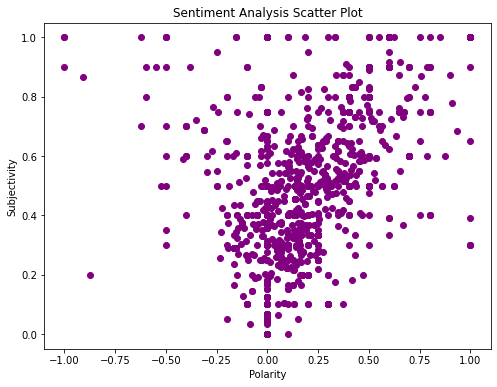

In [48]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple')
plt.title('Sentiment Analysis Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

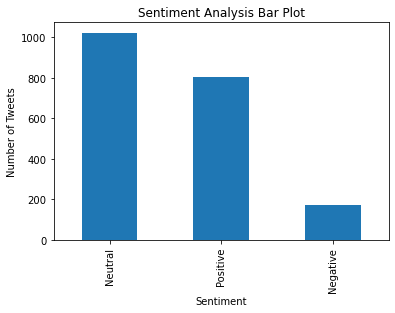

In [49]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()
